### Reading and Understanding the Dataset

In [235]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
# plt.style.use('seaborn')

In [236]:
#load dataset
df_main = pd.read_csv('Car details v3.csv')

In [237]:
df_main.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [238]:
df_main.shape

(8128, 12)

In [239]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [240]:
#numerical stats
df_main.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [241]:
#missing values
df_main.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

### Data Preprocessing

In [242]:
df_main['age'] = 2025 - df_main['year']
df_main.drop('year',axis=1,inplace = True)

In [243]:
# Define manual mapping
label_mapping = {'First Owner': int(0), 'Second Owner': int(1), 'Third Owner': int(2), 'Fourth & Above Owner': int(3)}

# Apply mapping
df_main['owner'] = df_main['owner'].map(label_mapping)

In [244]:
df_main = df_main.dropna(subset=['mileage', 'owner'])
df_main['owner'] = df_main['owner'].astype(int)
df_main.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,0,23.4 kmpl,1248 CC,74 bhp,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,1,21.14 kmpl,1498 CC,103.52 bhp,5.0,11
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,2,17.7 kmpl,1497 CC,78 bhp,5.0,19
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,0,23.0 kmpl,1396 CC,90 bhp,5.0,15
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,0,16.1 kmpl,1298 CC,88.2 bhp,5.0,18


In [245]:
# Apply mapping
df_main['max_power'] = df_main['max_power'].str.replace('bhp', '', regex=False).str.strip().replace('',0)
df_main['max_power'] = pd.to_numeric(df_main['max_power'], errors='coerce')

In [246]:
df_main['engine'] = df_main['engine'].str.replace('CC', '', regex=False).str.strip()
df_main['engine'] = pd.to_numeric(df_main['engine'], errors='coerce')

In [247]:
# df_main['mileage'] = df_main['mileage'].str.replace(' km/kg', '', regex=False).replace(' kmpl', '')
# df_main['mileage'] = pd.to_numeric(df_main['mileage'], errors='coerce')



In [248]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7902 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7902 non-null   object 
 1   selling_price  7902 non-null   int64  
 2   km_driven      7902 non-null   int64  
 3   fuel           7902 non-null   object 
 4   seller_type    7902 non-null   object 
 5   transmission   7902 non-null   object 
 6   owner          7902 non-null   int64  
 7   mileage        7902 non-null   object 
 8   engine         7902 non-null   int64  
 9   max_power      7902 non-null   float64
 10  seats          7902 non-null   float64
 11  age            7902 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 802.5+ KB


In [249]:
df_main.rename(columns = {'mileage(kmpl)':'mileage','engine(CC)':'engine','max_power(bhp)':'max_power'}, inplace = True)

In [254]:
df_main.isna().sum()


name             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
age              0
dtype: int64

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [255]:
df_main.columns

Index(['name', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'age'],
      dtype='object')

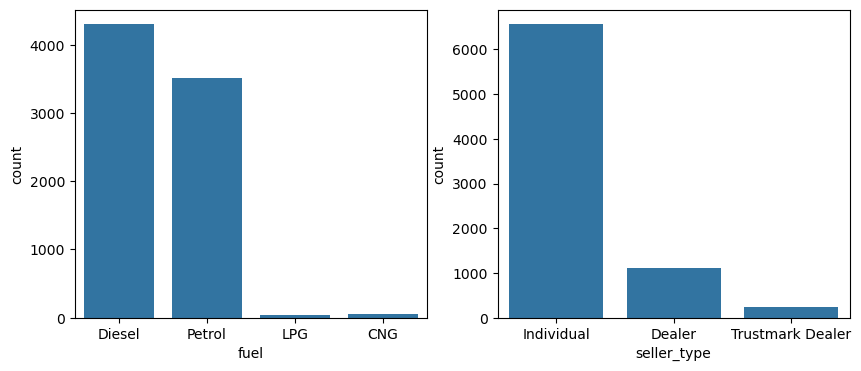

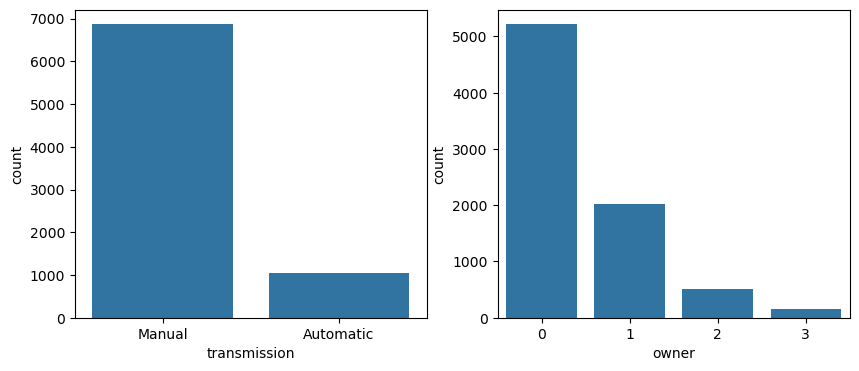

In [ ]:
cat_cols = ['fuel','seller_type','transmission','owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    plt.show()

In [256]:
df_main.columns


Index(['name', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'age'],
      dtype='object')

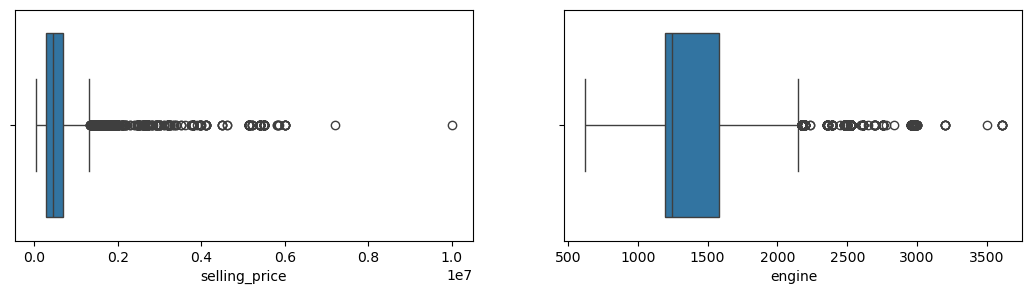

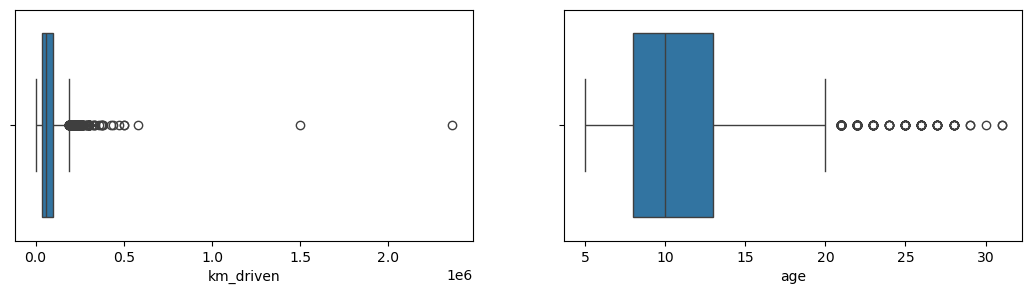

In [257]:
num_cols = ['selling_price','engine','km_driven','age', 'max_power', 'seats']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    plt.show()

In [ ]:
df_main[df_main['engine'] > df_main['engine'].quantile(0.99)]

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
47,Toyota Fortuner 4x4 MT,1500000,77000,Diesel,Dealer,Manual,0,12.55 kmpl,2982,168.50,7.0,11
75,Toyota Fortuner 4x4 MT,1700000,78000,Diesel,Individual,Manual,1,12.55 kmpl,2982,168.50,7.0,10
134,Jeep Wrangler 2016-2019 3.6 4X4,4100000,17000,Petrol,Individual,Automatic,0,9.5 kmpl,3604,280.00,5.0,8
136,Mercedes-Benz S-Class S 350 CDI,6000000,37000,Diesel,Dealer,Automatic,0,13.5 kmpl,2987,254.79,5.0,8
148,Mercedes-Benz S-Class S 350 CDI,5850000,47000,Diesel,Dealer,Automatic,0,13.5 kmpl,2987,282.00,5.0,8
187,Toyota Fortuner 4x2 Manual,1750000,30000,Diesel,Individual,Manual,1,13.0 kmpl,2982,168.50,7.0,11
265,Toyota Fortuner 3.0 Diesel,1150000,181000,Diesel,Individual,Manual,1,11.5 kmpl,2982,171.00,7.0,14
468,Toyota Fortuner 4x2 AT,2000000,60000,Diesel,Individual,Automatic,0,12.55 kmpl,2982,168.50,7.0,10
470,Toyota Fortuner 4x2 AT,1900000,130000,Diesel,Individual,Automatic,0,12.55 kmpl,2982,168.50,7.0,10
628,Honda Accord V6 AT,275000,100000,Petrol,Individual,Automatic,1,9.0 kmpl,2997,218.00,5.0,21


In [260]:
df_main[df_main['selling_price'] > df_main['selling_price'].quantile(0.99)]

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
136,Mercedes-Benz S-Class S 350 CDI,6000000,37000,Diesel,Dealer,Automatic,0,13.5 kmpl,2987,254.79,5.0,8
139,BMW X4 M Sport X xDrive20d,5800000,7500,Diesel,Dealer,Automatic,0,16.78 kmpl,1995,190.00,5.0,6
148,Mercedes-Benz S-Class S 350 CDI,5850000,47000,Diesel,Dealer,Automatic,0,13.5 kmpl,2987,282.00,5.0,8
170,Volvo XC90 T8 Excellence BSIV,10000000,30000,Petrol,Individual,Automatic,0,42.0 kmpl,1969,400.00,4.0,8
384,BMW X4 M Sport X xDrive20d,5400000,7500,Diesel,Dealer,Automatic,0,16.78 kmpl,1995,190.00,5.0,6
385,BMW X4 M Sport X xDrive20d,5500000,8500,Diesel,Dealer,Automatic,0,16.78 kmpl,1995,190.00,5.0,6
423,BMW X4 M Sport X xDrive20d,5400000,7500,Diesel,Dealer,Automatic,0,16.78 kmpl,1995,190.00,5.0,6
424,BMW X4 M Sport X xDrive20d,5500000,8500,Diesel,Dealer,Automatic,0,16.78 kmpl,1995,190.00,5.0,6
660,BMW X4 M Sport X xDrive20d,5400000,7500,Diesel,Dealer,Automatic,0,16.78 kmpl,1995,190.00,5.0,6
661,BMW X4 M Sport X xDrive20d,5500000,8500,Diesel,Dealer,Automatic,0,16.78 kmpl,1995,190.00,5.0,6


In [261]:
df_main[df_main['km_driven'] > df_main['km_driven'].quantile(0.99)]

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
394,Toyota Innova 2.5 G1 Diesel 8-seater,250000,240000,Diesel,Individual,Manual,2,12.8 kmpl,2494,102.00,8.0,20
401,Tata Indigo LS,95000,265000,Diesel,Individual,Manual,1,17.0 kmpl,1405,70.00,5.0,13
461,Toyota Innova 2.5 G (Diesel) 7 Seater,730000,250000,Diesel,Individual,Manual,0,12.99 kmpl,2494,100.00,7.0,13
886,Mahindra Bolero DI Non AC BSIII,320000,300000,Diesel,Individual,Manual,2,13.6 kmpl,2523,63.00,7.0,15
998,Maruti Wagon R LXI BS IV,220000,360003,Petrol,Individual,Manual,1,18.9 kmpl,998,67.10,5.0,13
1237,Mahindra Xylo D4 BSIII,200000,300000,Diesel,Individual,Manual,0,14.0 kmpl,2498,112.00,8.0,12
1348,Maruti Ertiga BSIV VXI,700000,227000,Petrol,Individual,Manual,0,17.5 kmpl,1373,91.10,7.0,8
1629,Toyota Innova 2.5 V Diesel 7-seater,450000,334000,Diesel,Individual,Manual,0,12.8 kmpl,2494,102.00,7.0,15
1810,Mahindra XUV500 W6 2WD,500000,1500000,Diesel,Individual,Manual,0,15.1 kmpl,2179,140.00,7.0,13
1997,Mahindra Scorpio VLX 2WD AIRBAG BSIV,550000,300000,Diesel,Individual,Manual,2,12.05 kmpl,2179,120.00,8.0,11


In [262]:
df_main[df_main['age'] > df_main['age'].quantile(0.99)]


,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
7,Maruti 800 DX BSII,45000,5000,Petrol,Individual,Manual,1,16.1 kmpl,796,37.0,4.0,24
18,Maruti Alto LX,150000,80000,Petrol,Individual,Manual,1,19.7 kmpl,796,46.3,5.0,23
177,Maruti 800 Std,40000,40000,Petrol,Individual,Manual,1,16.1 kmpl,796,37.0,4.0,26
186,Daewoo Matiz SD,100000,60000,Petrol,Individual,Manual,0,18.5 kmpl,796,53.0,5.0,25
333,Maruti Zen LXI,60000,100000,Petrol,Individual,Manual,3,17.3 kmpl,993,60.0,5.0,23
542,Maruti Alto LXI,140000,50000,Petrol,Individual,Manual,1,19.7 kmpl,796,46.3,5.0,23
808,Maruti 800 AC,80000,70000,Petrol,Individual,Manual,3,16.1 kmpl,796,37.0,4.0,25
901,Maruti 800 Std,40000,80000,Petrol,Individual,Manual,2,16.1 kmpl,796,37.0,4.0,23
999,Maruti 800 AC,55000,60000,Petrol,Individual,Manual,1,16.1 kmpl,796,37.0,4.0,26
1025,Maruti Alto LX,108000,206000,Petrol,Individual,Manual,3,19.7 kmpl,796,46.3,5.0,25


In [263]:
df_main[df_main['max_power'] > df_main['max_power'].quantile(0.99)]


,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
132,Lexus ES 300h,5150000,20000,Petrol,Dealer,Automatic,0,22.37 kmpl,2487,214.56,5.0,6
134,Jeep Wrangler 2016-2019 3.6 4X4,4100000,17000,Petrol,Individual,Automatic,0,9.5 kmpl,3604,280.00,5.0,8
136,Mercedes-Benz S-Class S 350 CDI,6000000,37000,Diesel,Dealer,Automatic,0,13.5 kmpl,2987,254.79,5.0,8
146,Audi Q7 35 TDI Quattro Premium,2650000,53000,Diesel,Dealer,Automatic,0,12.07 kmpl,2967,241.40,7.0,10
148,Mercedes-Benz S-Class S 350 CDI,5850000,47000,Diesel,Dealer,Automatic,0,13.5 kmpl,2987,282.00,5.0,8
170,Volvo XC90 T8 Excellence BSIV,10000000,30000,Petrol,Individual,Automatic,0,42.0 kmpl,1969,400.00,4.0,8
371,Lexus ES 300h,5150000,20000,Petrol,Dealer,Automatic,0,22.37 kmpl,2487,214.56,5.0,6
410,Lexus ES 300h,5150000,20000,Petrol,Dealer,Automatic,0,22.37 kmpl,2487,214.56,5.0,6
628,Honda Accord V6 AT,275000,100000,Petrol,Individual,Automatic,1,9.0 kmpl,2997,218.00,5.0,21
647,Lexus ES 300h,5150000,20000,Petrol,Dealer,Automatic,0,22.37 kmpl,2487,214.56,5.0,6


In [264]:
df_main[df_main['seats'] > df_main['seats'].quantile(0.99)]


,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
604,Tata Sumo CX 10 Str BSIV,175000,20000,Diesel,Individual,Manual,0,12.2 kmpl,1948,68.0,10.0,14
795,Chevrolet Tavera Neo 3 LS 10 Str,409999,60000,Diesel,Individual,Manual,1,12.2 kmpl,1994,105.3,10.0,9
2086,Tata Sumo EX 10/7 Str BSIII,200000,67500,Diesel,Individual,Manual,0,12.2 kmpl,1948,68.0,10.0,13
2331,Chevrolet Tavera Neo 3 10 Seats BSIII,600000,110000,Diesel,Individual,Manual,0,13.58 kmpl,2499,72.4,10.0,11
3283,Chevrolet Tavera Neo 3 LS 10 Seats BSIII,580000,110000,Diesel,Individual,Manual,1,13.58 kmpl,2499,72.4,10.0,10
3714,Chevrolet Tavera B3 LT L1 10 Seats BSIII,160000,220000,Diesel,Individual,Manual,0,14.8 kmpl,2499,80.0,10.0,20
3794,Chevrolet Tavera LS B3 10 Seats BSII,225000,100000,Diesel,Individual,Manual,0,14.8 kmpl,2499,80.0,10.0,19
4112,Tata Sumo SE Plus BSII,95000,120000,Diesel,Individual,Manual,3,12.2 kmpl,1948,68.0,10.0,25
4182,Chevrolet Tavera B1-10 seats BSII,280000,100000,Diesel,Individual,Manual,1,14.8 kmpl,2499,80.0,10.0,15
4575,Tata Winger Deluxe - Flat Roof (Non-AC),235000,50000,Diesel,Individual,Manual,0,10.71 kmpl,1948,90.0,14.0,15


#### Bivariate/Multi-Variate Analysis

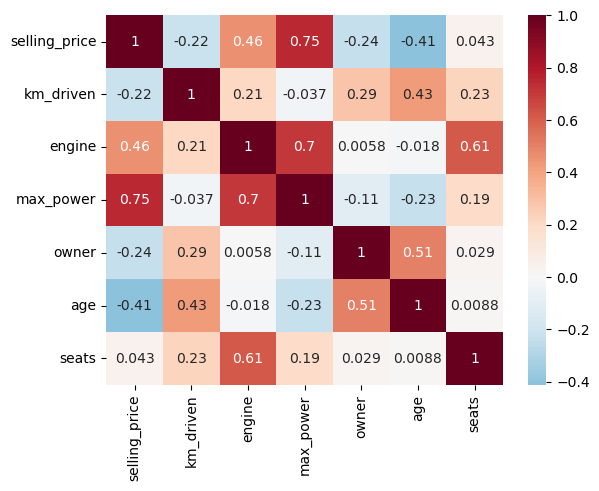

In [268]:
sns.heatmap(df_main[['selling_price', 'km_driven', 'engine', 'max_power', 'owner', 'age', 'seats']].corr(), annot=True, cmap="RdBu_r", center=0)
plt.show()

In [270]:
df_main[['selling_price', 'km_driven', 'engine', 'max_power', 'owner', 'age', 'seats']].corr()['selling_price']

selling_price    1.000000
km_driven       -0.221506
engine           0.458094
max_power        0.750249
owner           -0.235173
age             -0.412486
seats            0.043024
Name: selling_price, dtype: float64

In [277]:
df_main[['selling_price', 'km_driven', 'engine', 'max_power', 'owner', 'age', 'seats','seller_type','fuel']].pivot_table(values='selling_price', index = 'seller_type', columns= 'fuel')

fuel,CNG,Diesel,LPG,Petrol
seller_type,,,,
Dealer,NaN,1.713765e+06,225000.000000,1.000920e+06
Individual,313415.037736,6.267308e+05,210470.588235,3.680505e+05
Trustmark Dealer,NaN,7.632353e+05,NaN,8.083366e+05


In [ ]:
df_main[['selling_price', 'km_driven', 'engine', 'max_power', 'owner', 'age', 'seats']].pivot_table(values='selling_price', index = 'Seller_Type', columns= 'Transmission')

### Data Preparation

#### Creating Dummies for Categorical Features

In [279]:
df_main.drop(labels='name',axis= 1, inplace = True)

In [280]:
df_main.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,0,23.4 kmpl,1248,74.00,5.0,11
1,370000,120000,Diesel,Individual,Manual,1,21.14 kmpl,1498,103.52,5.0,11
2,158000,140000,Petrol,Individual,Manual,2,17.7 kmpl,1497,78.00,5.0,19
3,225000,127000,Diesel,Individual,Manual,0,23.0 kmpl,1396,90.00,5.0,15
4,130000,120000,Petrol,Individual,Manual,0,16.1 kmpl,1298,88.20,5.0,18


In [281]:
df_main = pd.get_dummies(data = df_main,drop_first=True) 

In [282]:
df_main.head()

,selling_price,km_driven,owner,engine,max_power,seats,age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,mileage_10.0 kmpl,mileage_10.1 kmpl,mileage_10.5 kmpl,mileage_10.71 kmpl,mileage_10.75 kmpl,mileage_10.8 kmpl,mileage_10.9 km/kg,mileage_10.9 kmpl,mileage_10.91 kmpl,mileage_10.93 kmpl,mileage_11.0 kmpl,mileage_11.07 kmpl,mileage_11.1 kmpl,mileage_11.18 kmpl,mileage_11.2 kmpl,mileage_11.3 kmpl,mileage_11.36 kmpl,mileage_11.4 kmpl,mileage_11.45 kmpl,mileage_11.5 kmpl,mileage_11.57 kmpl,mileage_11.68 kmpl,mileage_11.7 kmpl,mileage_11.72 kmpl,mileage_11.74 kmpl,mileage_11.79 kmpl,mileage_11.8 kmpl,mileage_11.88 km/kg,mileage_11.9 kmpl,mileage_11.96 kmpl,mileage_12.0 kmpl,mileage_12.05 kmpl,mileage_12.07 kmpl,mileage_12.08 kmpl,mileage_12.1 kmpl,mileage_12.12 kmpl,mileage_12.2 kmpl,mileage_12.3 kmpl,mileage_12.4 kmpl,mileage_12.5 kmpl,mileage_12.55 kmpl,mileage_12.6 kmpl,mileage_12.62 kmpl,mileage_12.7 kmpl,mileage_12.8 kmpl,mileage_12.83 kmpl,mileage_12.85 kmpl,mileage_12.9 kmpl,mileage_12.99 kmpl,mileage_13.0 kmpl,mileage_13.01 kmpl,mileage_13.1 kmpl,mileage_13.2 km/kg,mileage_13.2 kmpl,mileage_13.22 kmpl,mileage_13.24 kmpl,mileage_13.38 kmpl,mileage_13.4 kmpl,mileage_13.44 kmpl,mileage_13.45 km/kg,mileage_13.49 kmpl,mileage_13.5 kmpl,mileage_13.55 kmpl,mileage_13.58 kmpl,mileage_13.6 kmpl,mileage_13.68 kmpl,mileage_13.7 kmpl,mileage_13.73 kmpl,mileage_13.8 kmpl,mileage_13.87 kmpl,mileage_13.9 kmpl,mileage_13.93 kmpl,mileage_13.96 kmpl,mileage_14.0 kmpl,mileage_14.02 kmpl,mileage_14.07 kmpl,mileage_14.09 kmpl,mileage_14.1 kmpl,mileage_14.2 kmpl,mileage_14.21 kmpl,mileage_14.23 kmpl,mileage_14.24 kmpl,mileage_14.28 kmpl,mileage_14.3 kmpl,mileage_14.4 km/kg,mileage_14.4 kmpl,mileage_14.49 kmpl,mileage_14.5 kmpl,mileage_14.53 kmpl,mileage_14.6 kmpl,mileage_14.62 kmpl,mileage_14.66 kmpl,mileage_14.67 kmpl,mileage_14.7 kmpl,mileage_14.74 kmpl,mileage_14.8 kmpl,mileage_14.81 kmpl,mileage_14.84 kmpl,mileage_14.9 kmpl,mileage_14.94 kmpl,mileage_14.95 kmpl,mileage_14.99 kmpl,mileage_15.0 kmpl,mileage_15.04 kmpl,mileage_15.05 kmpl,mileage_15.1 km/kg,mileage_15.1 kmpl,mileage_15.11 kmpl,mileage_15.17 kmpl,mileage_15.2 kmpl,mileage_15.26 kmpl,mileage_15.29 kmpl,mileage_15.3 kmpl,mileage_15.37 kmpl,mileage_15.4 kmpl,mileage_15.41 kmpl,mileage_15.42 kmpl,mileage_15.5 kmpl,mileage_15.6 kmpl,mileage_15.63 kmpl,mileage_15.64 kmpl,mileage_15.7 kmpl,mileage_15.71 kmpl,mileage_15.73 kmpl,mileage_15.74 kmpl,mileage_15.8 kmpl,mileage_15.85 kmpl,mileage_15.9 kmpl,mileage_15.96 kmpl,mileage_16.0 km/kg,mileage_16.0 kmpl,mileage_16.02 kmpl,mileage_16.05 kmpl,mileage_16.07 kmpl,mileage_16.09 kmpl,mileage_16.1 kmpl,mileage_16.2 kmpl,mileage_16.25 kmpl,mileage_16.3 kmpl,mileage_16.34 kmpl,mileage_16.36 kmpl,mileage_16.38 kmpl,mileage_16.4 kmpl,mileage_16.47 kmpl,mileage_16.5 kmpl,mileage_16.51 kmpl,mileage_16.52 kmpl,mileage_16.55 kmpl,mileage_16.6 km/kg,mileage_16.6 kmpl,mileage_16.7 kmpl,mileage_16.73 kmpl,mileage_16.78 kmpl,mileage_16.8 kmpl,mileage_16.84 kmpl,mileage_16.9 kmpl,mileage_16.95 kmpl,mileage_16.96 kmpl,mileage_17.0 kmpl,mileage_17.01 kmpl,mileage_17.05 kmpl,mileage_17.09 kmpl,mileage_17.1 kmpl,mileage_17.11 kmpl,mileage_17.19 kmpl,mileage_17.2 kmpl,mileage_17.21 kmpl,mileage_17.3 km/kg,mileage_17.3 kmpl,mileage_17.36 kmpl,mileage_17.4 kmpl,mileage_17.42 kmpl,mileage_17.43 kmpl,mileage_17.45 kmpl,mileage_17.5 kmpl,mileage_17.57 kmpl,mileage_17.6 kmpl,mileage_17.67 kmpl,mileage_17.68 kmpl,mileage_17.7 kmpl,mileage_17.71 kmpl,mileage_17.8 km/kg,mileage_17.8 kmpl,mileage_17.88 kmpl,mileage_17.9 kmpl,mileage_17.92 kmpl,mileage_17.97 kmpl,mileage_18.0 kmpl,mileage_18.06 kmpl,mileage_18.1 kmpl,mileage_18.12 kmpl,mileage_18.15 kmpl,mileage_18.16 kmpl,mileage_18.2 kmpl,mileage_18.24 kmpl,mileage_18.25 kmpl,mileage_18.3 kmpl,mileage_18.4 kmpl,mileage_18.44 kmpl,mileage_18.48 kmpl,mileage_18.49 kmpl,mileage_18.5 kmpl,mileage_18.53 kmpl,mileage_18.6 kmpl,mileage_18.7 kmpl,mileage_18.76 kmpl,mi

### Train-Test Split

In [283]:
# Separating target variable and its features
y = df_main['selling_price']
X = df_main.drop('selling_price',axis=1)

In [284]:
from sklearn.model_selection import train_test_split

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (6321, 404)
x test:  (1581, 404)
y train:  (6321,)
y test:  (1581,)


### Model Creation/Evaluation

#### Applying regression models
1. Linear Regression 
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regression
5. Gradient Boosting regression

In [286]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [287]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model, model_name):
    # Training the model
    model.fit(X_train, y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train, y_pred_train)
    R2_train.append(round(R2_train_model, 2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test, y_pred_test)
    R2_test.append(round(R2_test_model, 2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean, 2))
    
    # Printing results
    print(f"{model_name} Model:")
    print("Train R2-score:", round(R2_train_model, 2))
    print("Test R2-score:", round(R2_test_model, 2))
    print("Train CV scores:", cross_val)
    print("Train CV mean:", round(cv_mean, 2))
    
    # Plotting Graphs
    # Residual Plot of train data
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    ax[0].set_title('Residual Plot of Train samples')
    sns.histplot(y_train - y_pred_train, kde=True, ax=ax[0], color='blue')
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # y_test vs y_pred_test scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(y_test, y_pred_test, alpha=0.7, color='red')
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.tight_layout()
    plt.show()

#### Standard Linear Regression or Ordinary Least Squares

Linear_regressor.pkl Model:
Train R2-score: 0.91
Test R2-score: 0.88
Train CV scores: [0.88087096 0.89067039 0.83469163 0.86446374 0.85798278]
Train CV mean: 0.87


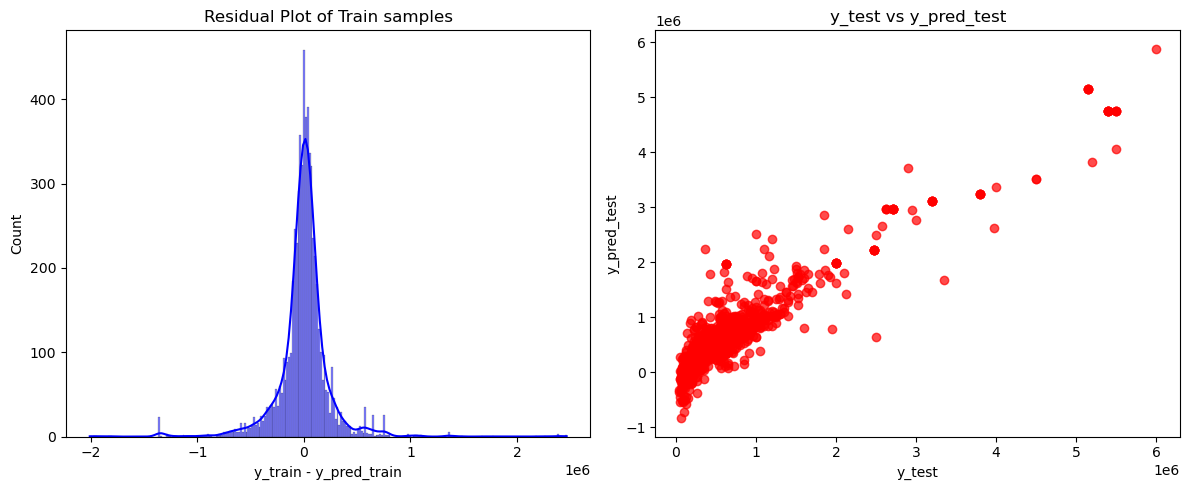

In [288]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

#### Ridge

ridge.pkl Model:
Train R2-score: 0.91
Test R2-score: 0.88
Train CV scores: [0.89079099 0.89262458 0.84337476 0.86756469 0.86025191]
Train CV mean: 0.87


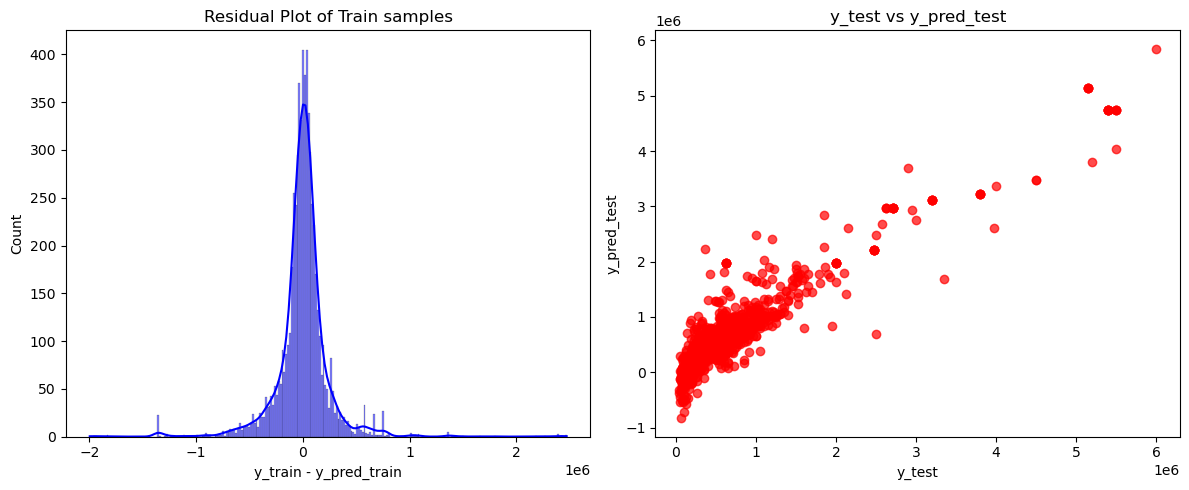

In [289]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

#### Lasso

In [290]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

lasso.pkl Model:
Train R2-score: 0.9
Test R2-score: 0.88
Train CV scores: [0.8885862  0.89339394 0.83799272 0.8693676  0.85454709]
Train CV mean: 0.87


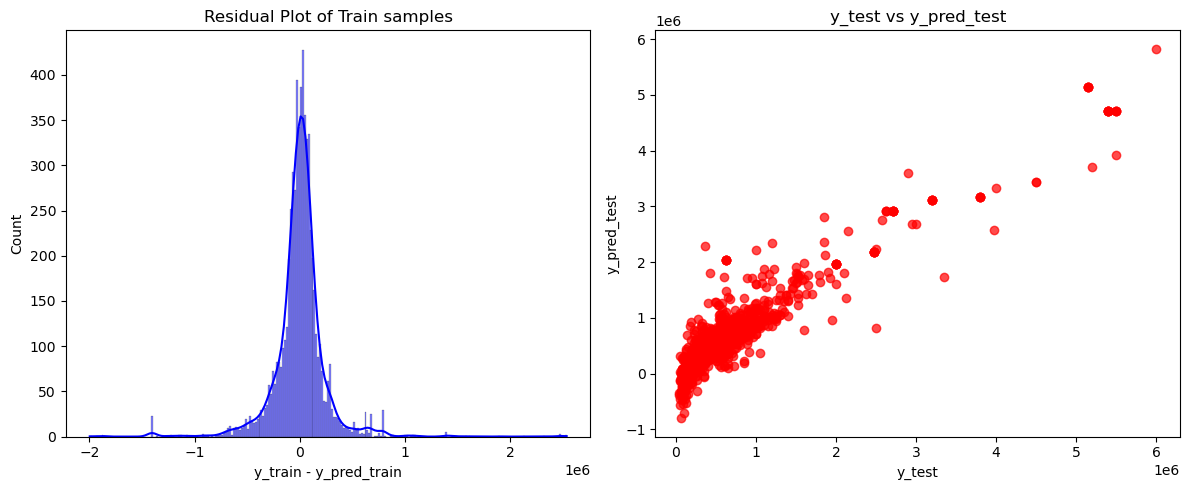

In [298]:
car_pred_model(ls_rs,"lasso.pkl")

#### Random Forest

In [292]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

random_forest.pkl Model:
Train R2-score: 0.8
Test R2-score: 0.8
Train CV scores: [0.82832649 0.72467601 0.75983996 0.57788892 0.77461714]
Train CV mean: 0.73


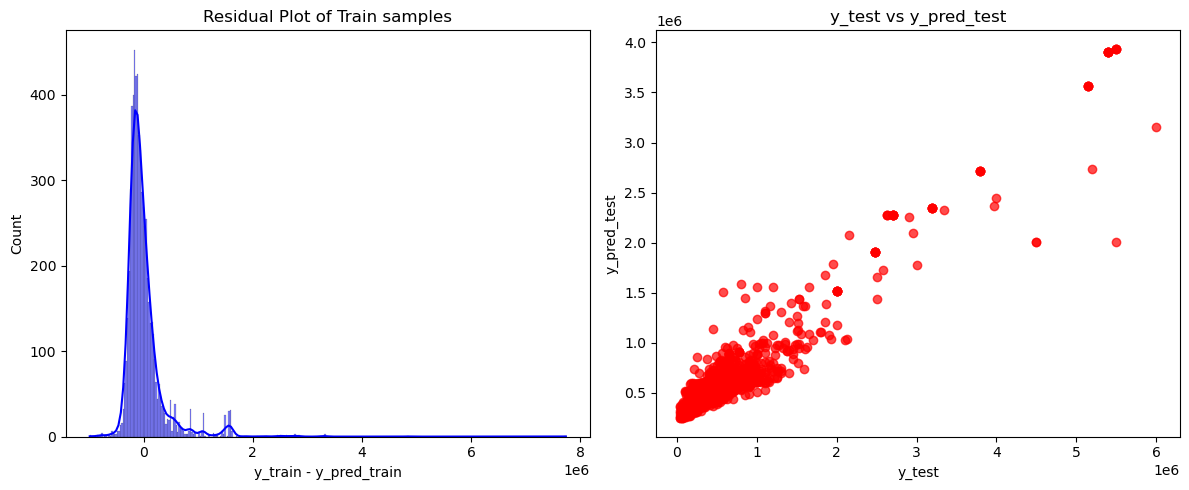

In [293]:
car_pred_model(rf_rs,'random_forest.pkl')

In [294]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=8, n_estimators=700)


#### Gradient Boosting

In [296]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

gradient_boosting.pkl Model:
Train R2-score: 0.99
Test R2-score: 0.97
Train CV scores: [0.97810568 0.94533315 0.93154126 0.96943645 0.88991813]
Train CV mean: 0.94


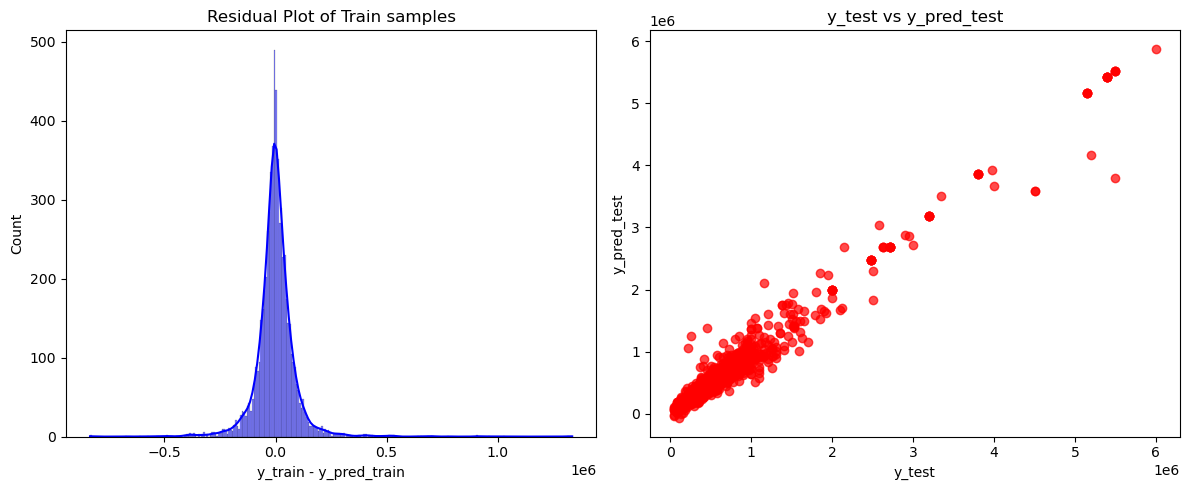

In [297]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [ ]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)